# Algorytmy genetyczne - problem Komiwojażera



W tym projekcie rozwiązujemy klasyczny problem NP-trudny – problem komiwojażera – za pomocą algorytmu genetycznego.
Celem jest znalezienie najkrótszej możliwej trasy odwiedzającej wszystkie miasta dokładnie raz i powrót do punktu startowego. 


### Importy + parametry

In [172]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

SEED = 42
NUM_CITY = 20 # liczba miast ktore trzeba polaczyc trasa


POPULATION_SIZE = 100 # liczba osobników (tras) ktora bierze udzial w algorytmie
NUM_GENERATIONS = 500 # liczba pokolen przez kotre musi przejsc algorytm, czyli ile razy bedzie sie wykonywal algorytm az znajdzie wynik 
CROSSOVER_PROB = 0.9
MUTATION_PROB = 0.1
np.random.seed(SEED)
'''
miasta = [
    (23, 45),
    (87, 12),
    (150, 220),
    (90, 180),
    (270, 60)
]'''


city = []
'''
for i in range(NUM_CITY):
    x = miasta[i][0]
    y = miasta[i][1]
    city.append((x,y))
    
'''

'\nfor i in range(NUM_CITY):\n    x = miasta[i][0]\n    y = miasta[i][1]\n    city.append((x,y))\n    \n'

### Generowanie współrzędnych miast

In [173]:
for i in range(NUM_CITY):
    x = np.random.uniform(0,300)
    y = np.random.uniform(0,300)
    city.append((x,y))
x_coords = [point[0] for point in city]
y_coords = [point[1] for point in city]


np.random.seed()

### Funkcja celu - obliczanie długości trasy

Funkcja oblicza sumaryczną długość trasy.  Odległość między miastami liczona jest w metryce euklidesowej.

In [174]:
def calculate_distance(route, city):
    distance = 0.0
    for i in range(len(city)):
        city1 = city[route[i]]
        city2 = city[route[(i+1) % len(route)]]
        dx = city2[0] - city1[0]
        dy = city2[1] - city1[1]
        dist = np.sqrt(dx**2 + dy ** 2)
        distance += dist
    return distance

### Incijalizacja populacji początkowej 


Dla każdej z tras obliczana jest jej długość.


In [175]:
Komiwojazer = []
list_of_sorted_routes = []

for count in range(POPULATION_SIZE):
    route = list(np.random.permutation(NUM_CITY))
    #route.append(route[0])
    total_distance = calculate_distance(route, city)
    list_of_sorted_routes.append(total_distance)
    Komiwojazer.append((route, total_distance))
    #print(f"trasa {i + 1}: {[r + 1 for r in route]} " )
    #print(f"Długość trasy {i + 1} wynosi {total_distance}")
    print(f"Trasa {count + 1}: {[r for r in route]} " )
    print(f"Długość trasy {count + 1} wynosi {total_distance}")

Trasa 1: [19, 7, 6, 3, 5, 9, 17, 8, 4, 16, 13, 15, 10, 14, 0, 1, 2, 18, 11, 12] 
Długość trasy 1 wynosi 3029.1957412007005
Trasa 2: [3, 6, 18, 13, 8, 11, 17, 2, 7, 15, 9, 10, 16, 19, 4, 14, 5, 12, 1, 0] 
Długość trasy 2 wynosi 3133.915897632516
Trasa 3: [5, 11, 4, 16, 6, 9, 10, 1, 19, 17, 18, 3, 7, 0, 8, 13, 15, 2, 14, 12] 
Długość trasy 3 wynosi 3293.962596923622
Trasa 4: [5, 1, 18, 7, 16, 11, 2, 8, 17, 14, 3, 0, 4, 9, 12, 6, 13, 10, 15, 19] 
Długość trasy 4 wynosi 3273.9600801179604
Trasa 5: [10, 19, 16, 8, 15, 7, 18, 17, 9, 14, 13, 5, 1, 0, 6, 2, 4, 12, 11, 3] 
Długość trasy 5 wynosi 3416.066075454787
Trasa 6: [8, 13, 5, 3, 4, 17, 2, 12, 19, 16, 7, 18, 14, 15, 6, 1, 0, 9, 11, 10] 
Długość trasy 6 wynosi 2633.1750746376515
Trasa 7: [1, 12, 15, 8, 10, 3, 6, 7, 5, 2, 13, 18, 4, 17, 0, 11, 14, 16, 19, 9] 
Długość trasy 7 wynosi 3655.479807936584
Trasa 8: [7, 16, 4, 18, 17, 15, 11, 6, 10, 0, 3, 8, 12, 14, 19, 5, 1, 9, 2, 13] 
Długość trasy 8 wynosi 3311.8157936028133
Trasa 9: [10, 5, 4, 

### Analiza początkowego pokolenia 

Sprawdzenie podstawowych statystyk

In [176]:
list_of_sorted_routes.sort()
print(list_of_sorted_routes)
mean = np.mean(list_of_sorted_routes)
print(f"Średnia długość trasy wynosi: {mean:.2f}")
diff = max(list_of_sorted_routes) - min(list_of_sorted_routes)
print(f"Różnica między najdłuższą a najkrótszą trasą wynosi: {diff:.2f}")


odl = math.sqrt((city[1][0] - city[0][0]) ** 2 + ( city[1][1] - city[0][1]) ** 2)
print(f"Odległość między miastem 2 a miastem 1 wynosi {odl}") 


chosen_route = Komiwojazer[0][0]

[2440.666421701654, 2560.1525228363303, 2565.353464814839, 2577.618594902828, 2589.11255269787, 2633.1750746376515, 2723.7351337873292, 2767.2498868280118, 2827.9277728388233, 2829.154221878147, 2863.131852102204, 2868.733767028603, 2895.0265392533743, 2916.528017004783, 2920.3831674626435, 2947.013583189091, 2970.5868299199064, 2985.2432390163553, 2993.687907940099, 2999.3949395310383, 3007.7242122197345, 3009.486633284893, 3019.8357714623157, 3029.1957412007005, 3053.7475638093692, 3067.6413446688302, 3070.565952084052, 3081.9740630282727, 3105.8778712636013, 3110.239454935907, 3110.8260678531897, 3113.8601916478137, 3121.986835253102, 3132.1396222165113, 3133.915897632516, 3146.574878915515, 3148.6497266753245, 3151.792008576902, 3154.7340307004793, 3163.6121557701167, 3168.4776796392143, 3179.8913803241426, 3187.451508366312, 3187.75239278694, 3193.1962689697407, 3193.99717968448, 3195.0387962741606, 3216.2406172015735, 3222.6212183536404, 3223.0293945071726, 3232.787493333637, 323

### Wizualizacja układu miast oraz początkowej trasy

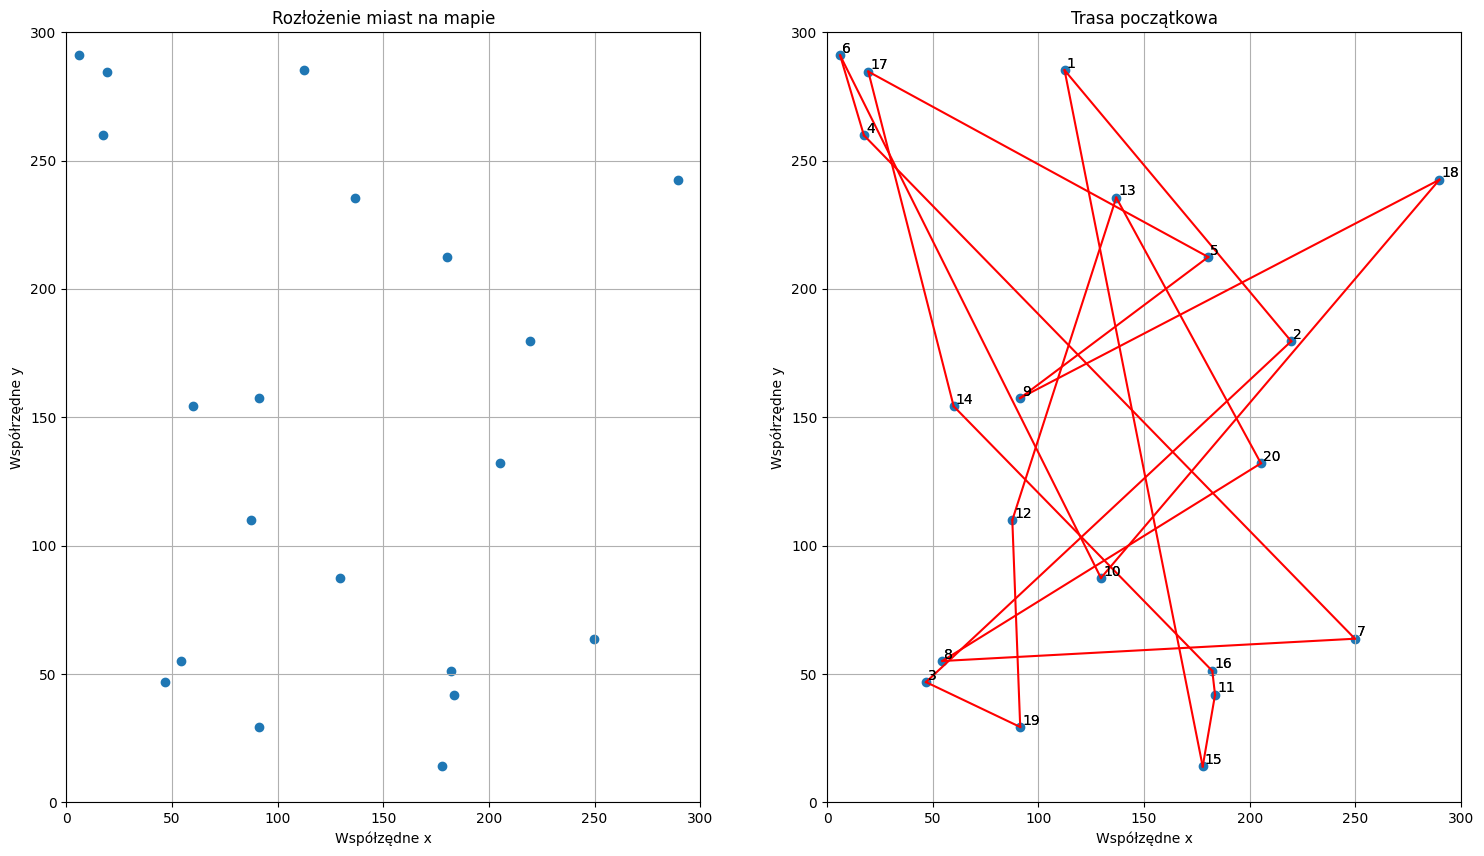

In [177]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))
axes[0].set_xlabel("Współzędne x")
axes[0].set_ylabel("Współrzędne y")
axes[0].set_title("Rozłożenie miast na mapie")
axes[0].grid(True)
axes[0].scatter(x_coords, y_coords)
axes[0].set_xlim(0, 300)
axes[0].set_ylim(0, 300)
for i, (x,y) in enumerate(city):
    plt.text(x+1, y+1, str(i+1))
    
    
    
axes[1].set_xlabel("Współzędne x")
axes[1].set_ylabel("Współrzędne y")
axes[1].set_title("Trasa początkowa")
axes[1].grid(True)
axes[1].scatter(x_coords, y_coords)
axes[1].set_xlim(0, 300)
axes[1].set_ylim(0, 300)


for i, (x,y) in enumerate(city):
    plt.text(x+1, y+1, str(i+1))
for j in range(len(route)):
    x1,y1  = city[chosen_route[j]]
    x2,y2 = city[chosen_route[(j+1) % len(chosen_route)]]
    plt.plot([x1,x2], [y1,y2], 'r-')

plt.show()







## Rozpoczęcie procesu algorytmu 

### Selekcja tras za pomocą metody rankingowej

In [178]:
## Populacja i selekcja

population = []

for k in range(len(Komiwojazer)):
    population.append(Komiwojazer[k])
    #population.sort()

#### selekcja rankingowa 


print(population)
population.sort(key = lambda x : x[1])
print(population)

best_route = population[0][0]
b_r = min(population, key = lambda x : x[1])
print(f"Długość najkrótszej trasy wynosi: {b_r[1]}")  

### wybieramy 20% najlepszych wynikow
parents_count = int(POPULATION_SIZE * 0.2)
parents = population[:parents_count]
print("Populacja do dalszego rozwoju: ")
print(parents)
print(len(parents))

[([19, 7, 6, 3, 5, 9, 17, 8, 4, 16, 13, 15, 10, 14, 0, 1, 2, 18, 11, 12], 3029.1957412007005), ([3, 6, 18, 13, 8, 11, 17, 2, 7, 15, 9, 10, 16, 19, 4, 14, 5, 12, 1, 0], 3133.915897632516), ([5, 11, 4, 16, 6, 9, 10, 1, 19, 17, 18, 3, 7, 0, 8, 13, 15, 2, 14, 12], 3293.962596923622), ([5, 1, 18, 7, 16, 11, 2, 8, 17, 14, 3, 0, 4, 9, 12, 6, 13, 10, 15, 19], 3273.9600801179604), ([10, 19, 16, 8, 15, 7, 18, 17, 9, 14, 13, 5, 1, 0, 6, 2, 4, 12, 11, 3], 3416.066075454787), ([8, 13, 5, 3, 4, 17, 2, 12, 19, 16, 7, 18, 14, 15, 6, 1, 0, 9, 11, 10], 2633.1750746376515), ([1, 12, 15, 8, 10, 3, 6, 7, 5, 2, 13, 18, 4, 17, 0, 11, 14, 16, 19, 9], 3655.479807936584), ([7, 16, 4, 18, 17, 15, 11, 6, 10, 0, 3, 8, 12, 14, 19, 5, 1, 9, 2, 13], 3311.8157936028133), ([10, 5, 4, 12, 13, 1, 11, 18, 6, 0, 7, 19, 17, 3, 2, 16, 15, 14, 8, 9], 3385.426699452277), ([13, 7, 2, 9, 3, 17, 14, 15, 6, 8, 16, 19, 4, 5, 1, 18, 11, 0, 10, 12], 3148.6497266753245), ([6, 13, 9, 16, 8, 15, 5, 11, 0, 2, 18, 19, 10, 1, 3, 14, 12, 4,

### Funkcja do operacji krzyżowania

Stosujemy metodę Order Crossover (OX), aby stworzyć nowe trasy. Celem krzyżowania jest wymieszanie dwóch tras rodziców w taki sposób, aby dziecko zawierało elementy obu tras, przy jednoczesnym zachowaniu reguły, że każde miasto musi wystąpić tylko raz. Proces polega na wybraniu losowego fragmentu jednej trasy i wstawieniu go do dziecka, a następnie uzupełnieniu pozostałych miejsc miastami z drugiego rodzica, zachowując kolejność ich występowania, z pominięciem już dodanych miast

In [179]:
## krzyżowanie  ( mieszanie fragmentów tras )
def crossover(parent1, parent2): 
    start = np.random.randint(0, len(parent1) - 1) # losujemy pozycje startpowa z zakresu od 0 do dlugosci trasy
    end = np.random.randint(start + 1, len(parent1)) # losujemy pozycje koncowa od start + 1 do dlugosci trasy 
    child = [None] * len(parent1) # puste miesjca o dlugosci trasy 
    child[start:end] = parent1[start: end] # przypisujemy dla pozycji od start do end do dziecka te same z parent 1
    
    # dodajemy pozostale miejsca  z parent2 z pominieciem tych ktore ewaiete zostaly do fragmentu 
    current_index = end
    for i in parent2:
        if i not in child:
            child[current_index % len(parent1)] = i
            current_index += 1
    return child

### Funkcja do operacji mutacji

Mutacja polega na wymianie dwóch losowo wybranych miast w trasie, jeśli wylosowana wartość jest mniejsza niż zadana prawdopodobieństwo mutacji

In [180]:
## mutacja
def mutation(route, mutation_prob):
    if np.random.rand() < mutation_prob:
        x = np.random.randint(0, len(route))
        y = np.random.randint(0, len(route))
        route[x], route[y] = route[y], route[x]
        
    return route

### Główna pętla do ewolucji rozwiązań problemu oraz podgląd tras co 50 pokoleń

 W każdej iteracji (pokolenie) wybierana jest 20% najlepszych tras, które następnie przechodzą przez krzyżowanie i mutację.
 Wartości długości tras dla najlepszej, średniej i najgorszej trasy są zapisywane w odpowiednich listach do późniejszej analizy postępów algorytmu.


 Ponadto stworzone są wykresy co 50 pokoleń, na których widać jak zmieniają się najlepsze trasy w kolejnych pokoleniach.


Pokolenie 1
Populacja do krzyzowania: [([14, 4, 16, 0, 2, 18, 7, 11, 3, 17, 1, 12, 13, 8, 5, 9, 6, 15, 19, 10], 2440.666421701654), ([15, 10, 11, 5, 3, 13, 1, 19, 9, 6, 2, 18, 7, 0, 16, 17, 14, 8, 4, 12], 2560.1525228363303), ([4, 13, 5, 12, 9, 2, 3, 16, 8, 7, 10, 18, 0, 17, 1, 6, 19, 11, 14, 15], 2565.353464814839), ([16, 5, 13, 0, 7, 9, 2, 18, 15, 14, 6, 8, 1, 19, 12, 3, 10, 4, 17, 11], 2577.618594902828), ([17, 12, 2, 7, 8, 19, 6, 10, 5, 16, 13, 11, 4, 0, 9, 14, 18, 15, 1, 3], 2589.11255269787), ([8, 13, 5, 3, 4, 17, 2, 12, 19, 16, 7, 18, 14, 15, 6, 1, 0, 9, 11, 10], 2633.1750746376515), ([8, 11, 6, 14, 9, 1, 12, 17, 7, 15, 10, 13, 18, 2, 0, 19, 16, 5, 4, 3], 2723.7351337873292), ([14, 8, 0, 12, 18, 17, 19, 13, 3, 5, 7, 11, 9, 2, 6, 10, 15, 4, 1, 16], 2767.2498868280118), ([1, 6, 5, 4, 0, 12, 10, 19, 15, 2, 16, 14, 11, 13, 3, 8, 7, 18, 9, 17], 2827.9277728388233), ([7, 9, 11, 4, 5, 1, 19, 15, 6, 0, 8, 3, 16, 2, 18, 12, 17, 14, 13, 10], 2829.154221878147), ([1, 15, 9, 7, 6, 14, 8, 13

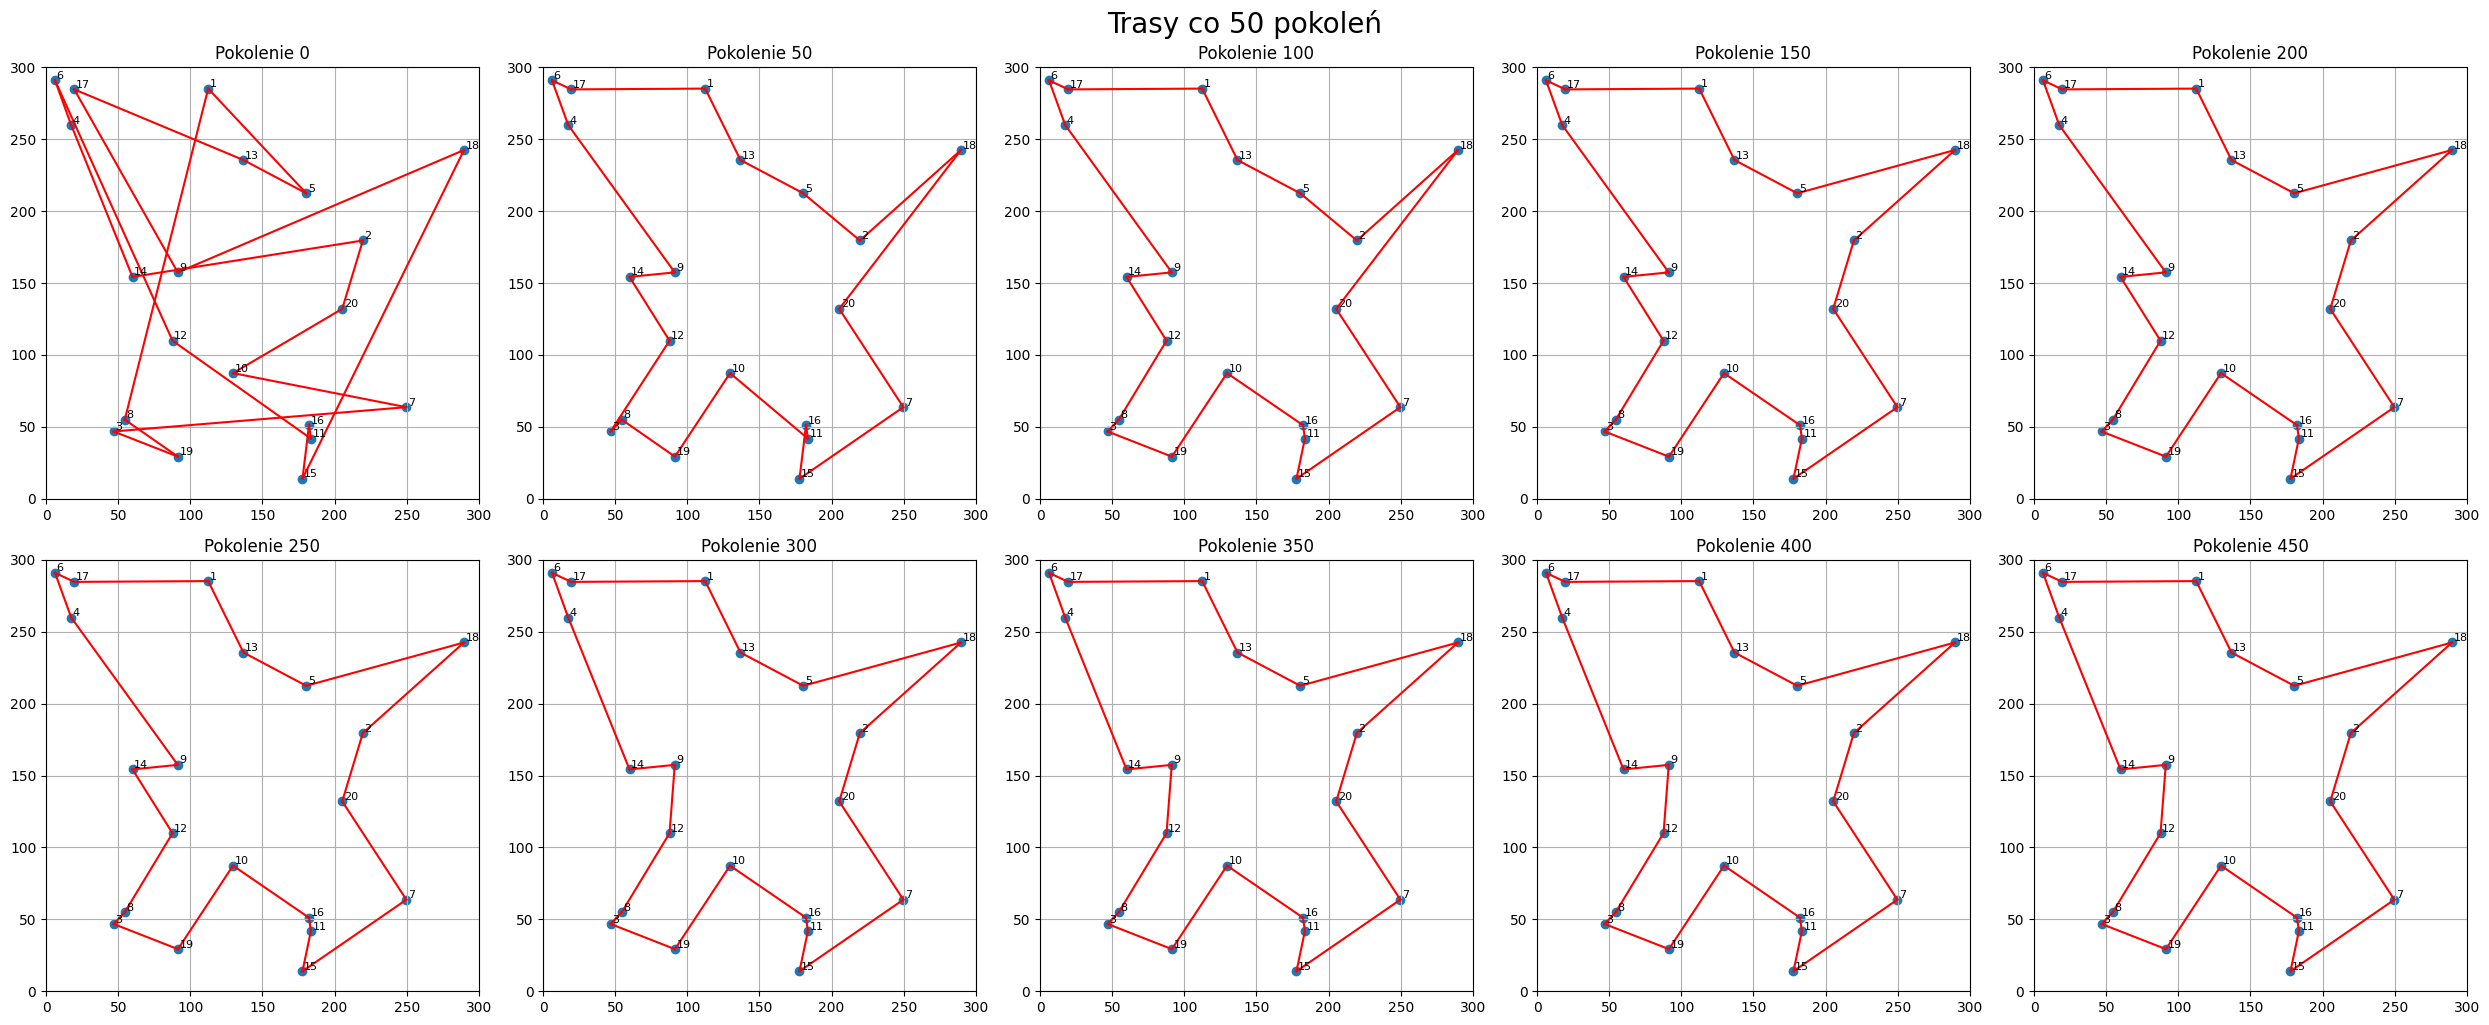

In [181]:
best_distances = []
average_distances = []
worst_distances = []
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10))  
plot_index = 0

## główmna pętla algorytmu
for generate in range(NUM_GENERATIONS):
    print(f"Pokolenie {generate + 1}")
    
    # Selekcja - wybieramy 20 % najlepszych tras
    population.sort(key = lambda x: x[1])
    parents_count = int(POPULATION_SIZE * 0.2)
    parents = population[:parents_count]
    print(f"Populacja do krzyzowania: {parents}")
    
    ## krzyżowanie 
    res =[]
    while(len(res) < POPULATION_SIZE - parents_count): # czyli do 100 - 20 = 80 -> 20 najlepszych + 80 powstalych przez mutacje i krzyzowania 
        parent1, parent2 = random.sample(parents, 2) # bierzemy 2 trasy z tych 20% najlepszych 
        child = crossover(parent1[0], parent2[0])
        res.append((child, calculate_distance(child, city)))
        
    ### mutacja
    
    for j in range(len(res)):
        res[j] = (mutation(res[j][0], MUTATION_PROB), calculate_distance(res[j][0], city))
    
    population  = parents + res
    best_route = min(population, key = lambda x : x[1])
    best_distances.append(best_route[1])
    
    
    # srednia i najgorsza trasa w danym pokoleniu
    avg_distance = np.mean([x[1] for x in population])
    worst_distance = max([x[1] for x in population])

    average_distances.append(avg_distance)
    worst_distances.append(worst_distance)
    
    
    print(f"Najlepsza trasa w pokoleniu {generate + 1} ma długość: {best_route[1]}")

    if generate % 50 == 0 and plot_index < 10:
        ax = axes[plot_index // 5][plot_index % 5] 
        ax.set_title(f"Pokolenie {generate}")
        ax.set_xlim(0, 300)
        ax.set_ylim(0, 300)
        ax.grid(True)
        ax.scatter(x_coords, y_coords)

        for i, (x, y) in enumerate(city):
            ax.text(x + 1, y + 1, str(i + 1), fontsize=8)

        full_route = best_route[0] + [best_route[0][0]]
        for temp in range(len(route)):
            x1, y1 = city[full_route[temp]]
            x2, y2 = city[full_route[temp + 1]]
            ax.plot([x1, x2], [y1, y2], 'r-')

        plot_index += 1 
        
        
        
plt.tight_layout()
plt.suptitle("Trasy co 50 pokoleń", fontsize=20, y=1.02)
plt.show()   

### Wizualizacja najlepszej trasy po zakończeniu algorytmu

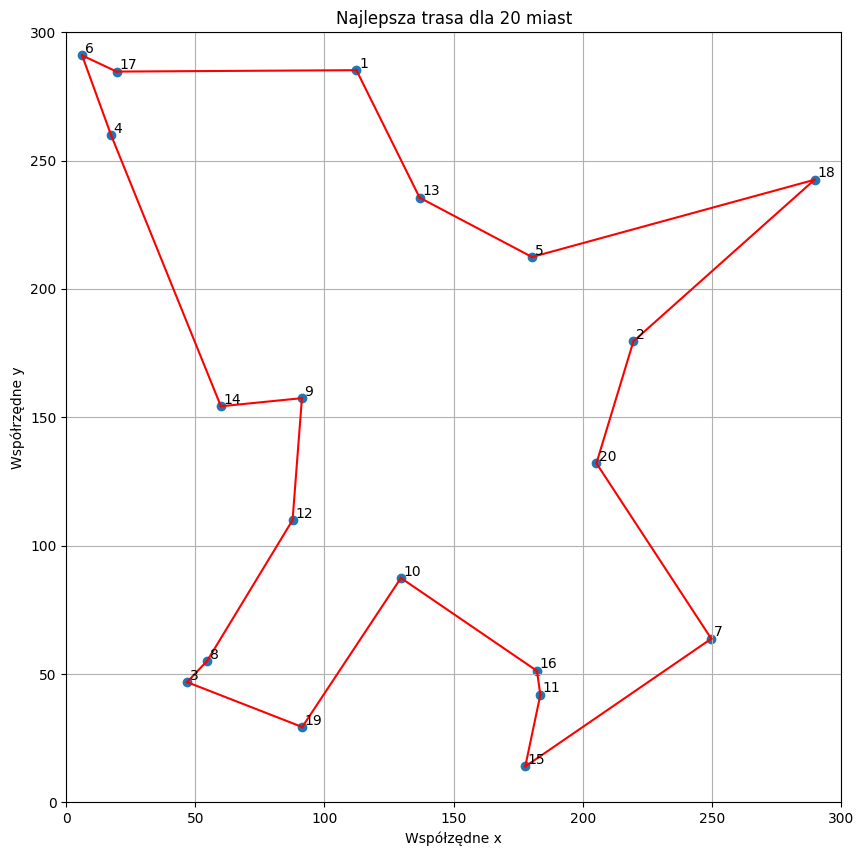

In [182]:
plt.figure(figsize=(10,10))
plt.xlabel("Współzędne x")
plt.ylabel("Współrzędne y")
plt.title(f"Najlepsza trasa dla {NUM_CITY} miast")
plt.grid(True)
plt.scatter(x_coords, y_coords)
plt.xlim(0,300)
plt.ylim(0,300)

for i, (x,y) in enumerate(city):
    plt.text(x+1, y+1, str(i+1))
    
 
full_route = best_route[0] + [best_route[0][0]]   
for j in range(len(route)):
    x1,y1  = city[full_route[j]]
    x2,y2 = city[full_route[j+1]]
    plt.plot([x1,x2], [y1,y2], 'r-')

plt.show()

###  Zmiana długości tras w pokoleniach

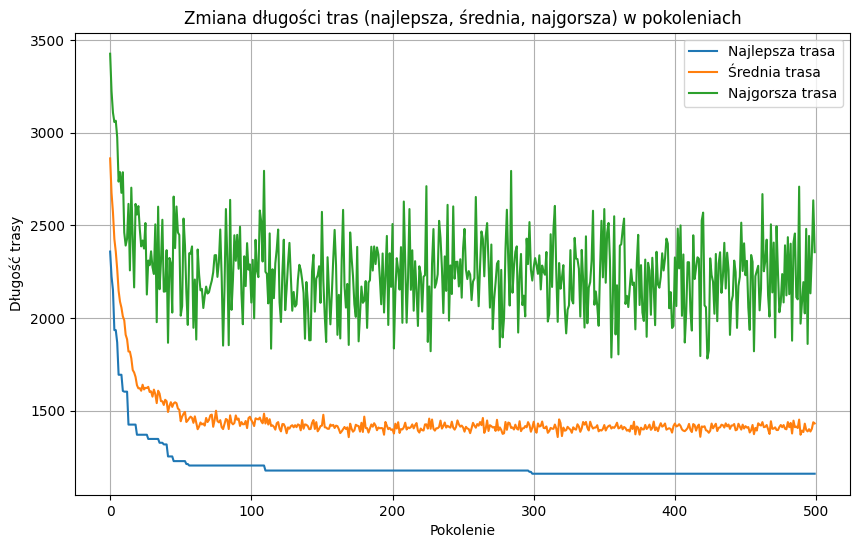

In [183]:
plt.figure(figsize=(10, 6))
plt.plot(range(NUM_GENERATIONS), best_distances, label='Najlepsza trasa')
plt.plot(range(NUM_GENERATIONS), average_distances, label='Średnia trasa')
plt.plot(range(NUM_GENERATIONS), worst_distances, label='Najgorsza trasa')
plt.xlabel('Pokolenie')
plt.ylabel('Długość trasy')
plt.title('Zmiana długości tras (najlepsza, średnia, najgorsza) w pokoleniach')
plt.grid(True)
plt.legend()
plt.show()

### Zmiana jakości rozwiązań w pokoleniach

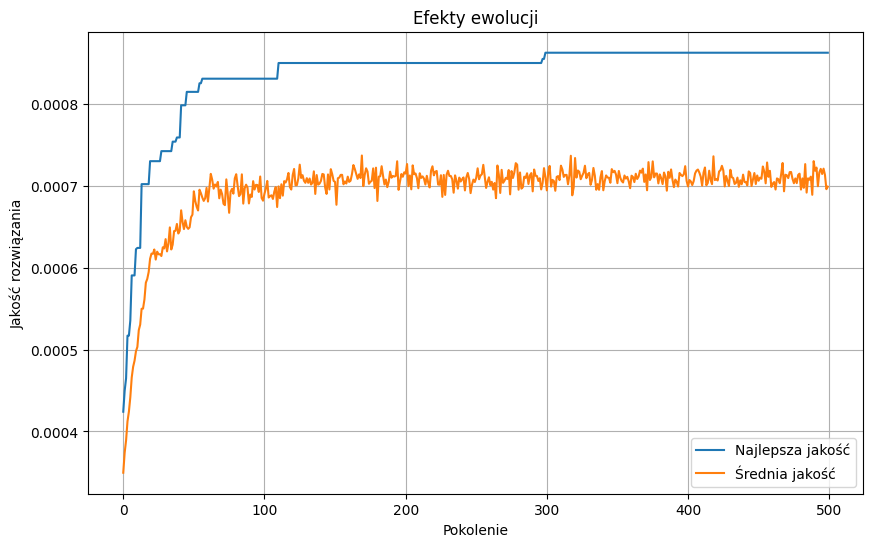

In [184]:
best_quality = [1 / dist for dist in best_distances]
average_quality = [1 / dist for dist in average_distances]


plt.figure(figsize=(10, 6))
plt.plot(range(NUM_GENERATIONS), best_quality, label='Najlepsza jakość')
plt.plot(range(NUM_GENERATIONS), average_quality, label='Średnia jakość')


plt.xlabel('Pokolenie')
plt.ylabel('Jakość rozwiązania')
plt.title('Efekty ewolucji')
plt.grid(True)
plt.legend()
plt.show()